# Star Wars Survey

In this project, we will be working with Jupyter notebook and analyzing data on the Star Wars movies.

## 1: Introduction To The Data
While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, we will be cleaning and exploring the data set in Jupyter notebook.

The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we will need to remove the invalid rows. For example, `RespondentID` is supposed to be a unique ID for each respondent, but it's blank in some rows. We will need to remove any rows with an invalid `RespondentID`.

* Read the data set into a dataframe.
* Explore the data. Look for any strange values in the columns and rows.
* Review the column names with `star_wars.columns`.
* Remove any rows where `RespondentID` is `NaN`. 

In [2]:
import pandas as pd
star_wars = pd.read_csv("data/star_wars.csv", encoding="ISO-8859-1")
print(star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

In [3]:
print(star_wars.columns)
print(star_wars.shape)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
print(star_wars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [5]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
print(star_wars.shape)

(1186, 38)


## 2: Cleaning And Mapping Yes/No Columns
Let's take a look at these two columns:
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. List all the unique values in these two columns, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`.

* Convert the `Have you seen any of the 6 films in the Star Wars franchise?` column to the Boolean type.
* Convert the `Do you consider yourself to be a fan of the Star Wars film franchise?` column to the Boolean type.

In [6]:
print(star_wars.shape[0])
print()

seen = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]
print(seen.value_counts())
print(sum(seen.value_counts()))
print('NaN   ',sum(seen.isnull()))
print()

fan = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]
print(fan.value_counts())
print(sum(fan.value_counts()))
print('NaN   ',sum(fan.isnull()))

1186

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
1186
NaN    0

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
836
NaN    350


In [7]:
yes_no = {"Yes": True, "No": False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = (
                    star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no))
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print()

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = (
                    star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no))
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [8]:
print(star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please selec

## 3: Cleaning And Mapping Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
* `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
* `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
* `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
* `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
* `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column to something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

Next, we'll need to rename the columns to better reflect what they represent. 

* Convert each column above so that it only contains the values `True` and `False`.
* Rename each of the columns above so the names are more intuitive. 

In [11]:
import numpy as np
mapping_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping_dict)

In [ ]:
star_wars = star_wars.rename(columns={
"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
"Unnamed: 4": "seen_2",
"Unnamed: 5": "seen_3",
"Unnamed: 6": "seen_4",
"Unnamed: 7": "seen_5",
"Unnamed: 8": "seen_6"
})

In [12]:
print(star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please selec

## 4: Cleaning The Ranking Columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

* Convert each of the columns above to a float type.
* Give each column a more descriptive name.

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
"Unnamed: 10": "ranking_2",
"Unnamed: 11": "ranking_3",
"Unnamed: 12": "ranking_4",
"Unnamed: 13": "ranking_5",
"Unnamed: 14": "ranking_6"
})

print(star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please selec

## 5: Finding The Highest-Ranked Movie
Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns.

* Compute the mean of each of the ranking columns from the last screen.
* Make a bar chart of each ranking.

In [14]:
print(star_wars[star_wars.columns[9:15]].mean())

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


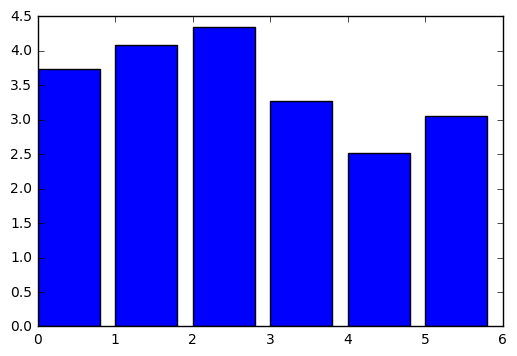

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.show()

#Movie rankings according to the survey (note that lower mean equals higher rating):  
1. Star Wars: Episode V The Empire Strikes Back
2. Star Wars: Episode VI Return of the Jedi
3. Star Wars: Episode IV A New Hope
4. Star Wars: Episode I  The Phantom Menace
5. Star Wars: Episode II Attack of the Clones
6. Star Wars: Episode III Revenge of the Sith

Observation:
It seems all the original 3 movies are rated much more highly that the newer ones.
It's surprising that that Revenge of the Sith has the lowest ranking among all 6 movies in the franchise. According to reviews, it was considered better than at least Episodes 1 and 2.          

## 6: Finding The Most Viewed Movie
* Compute the sum of each of the seen columns.
* Make a bar chart of each ranking.

In [17]:
print(star_wars[star_wars.columns[3:9]].sum())

Which of the following Star Wars films have you seen? Please select all that apply.    673
Unnamed: 4                                                                             571
Unnamed: 5                                                                             550
Unnamed: 6                                                                             607
Unnamed: 7                                                                             758
Unnamed: 8                                                                             738
dtype: int64


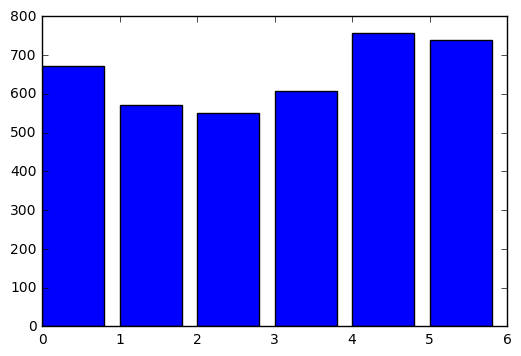

In [18]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt.show()

It appears that the original movies were seen more than the newer ones. This could explain why the newer movies got lower rankings.

## 7: Exploring The Data By Binary Segments
Let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups.

* `Do you consider yourself to be a fan of the Star Wars film franchise?` - True or False
* `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
* `Gender` - `Male` or `Female`

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

* Split the data into two groups based on the gender column.
* Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.

In [19]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

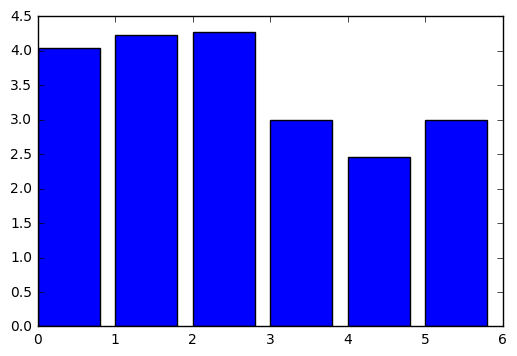

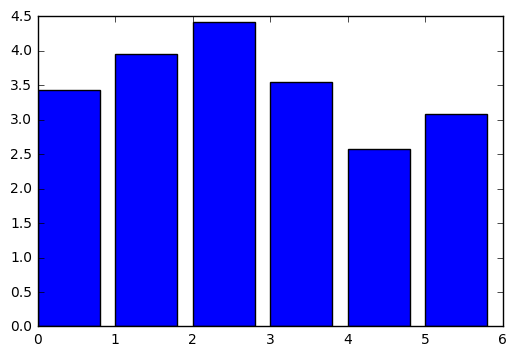

In [20]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

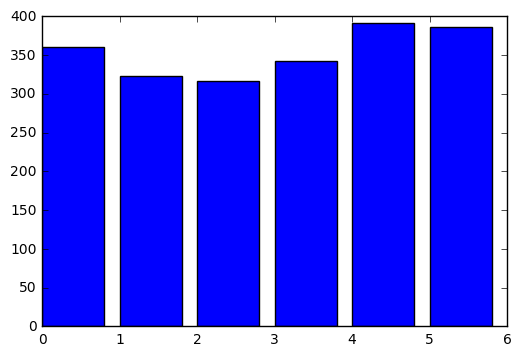

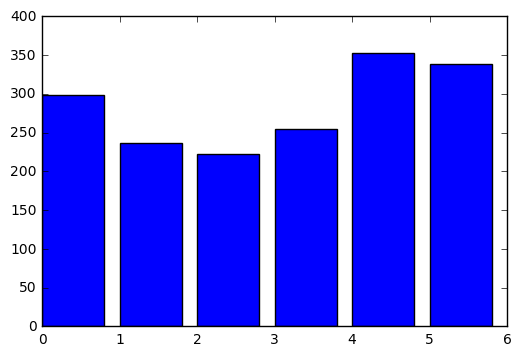

In [21]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

More males watched the newer movies than females. And they also ranked those movies lower than females.

Some potential next steps for exploring the data further:

* Segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?` and see if there are any interesting patterns.
* Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably and figure out the most liked and disliked characters.